In [1]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [2]:
import tensorflow as tf
import pathlib

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 136s 1us/step


In [3]:
import os
print(os.listdir(data_dir))

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']


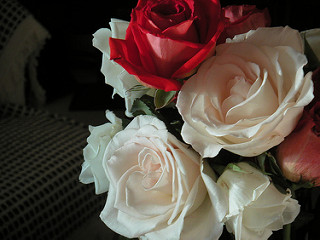

In [4]:
import PIL
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

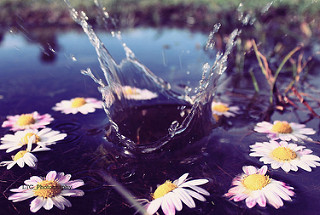

In [5]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


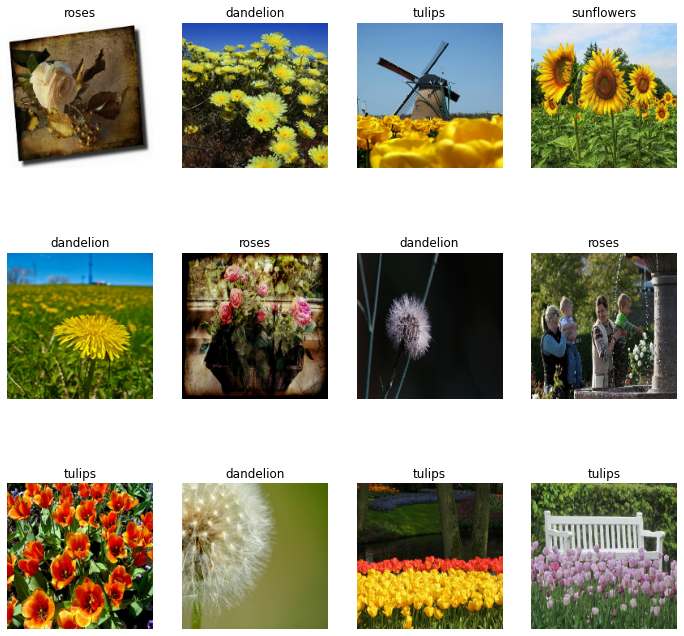

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
num_classes = len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Epoch 1/15


C:\Users\faisa\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 43s 445ms/step - loss: 1.3384 - accuracy: 0.4220 - val_loss: 1.0750 - val_accuracy: 0.5722
Epoch 2/15
92/92 [==============================] - 39s 424ms/step - loss: 1.0008 - accuracy: 0.5971 - val_loss: 1.0126 - val_accuracy: 0.5708
Epoch 3/15
92/92 [==============================] - 40s 435ms/step - loss: 0.8274 - accuracy: 0.6880 - val_loss: 0.9016 - val_accuracy: 0.6444
Epoch 4/15
92/92 [==============================] - 41s 439ms/step - loss: 0.6255 - accuracy: 0.7660 - val_loss: 0.8533 - val_accuracy: 0.6880
Epoch 5/15
92/92 [==============================] - 40s 430ms/step - loss: 0.4349 - accuracy: 0.8403 - val_loss: 0.9219 - val_accuracy: 0.6907
Epoch 6/15
92/92 [==============================] - 39s 425ms/step - loss: 0.2753 - accuracy: 0.9036 - val_loss: 1.2504 - val_accuracy: 0.6226
Epoch 7/15
92/92 [==============================] - 40s 433ms/step - loss: 0.1796 - accuracy: 0.9401 - val_loss: 1.1948 - val_accuracy: 0.6662
Epoch 8/15

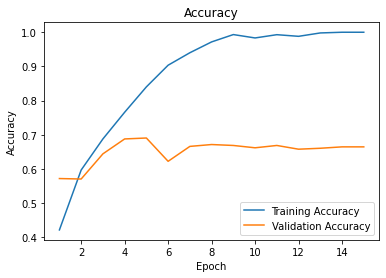

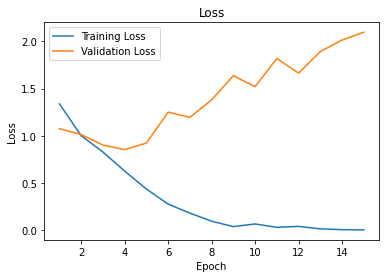

In [13]:
import matplotlib.pyplot as plt
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Get the accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(range(1, epochs + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(range(1, epochs + 1), loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()